In [344]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report


In [345]:
train = pd.read_csv('train_fktp.txt', sep=',', header=None, 
                    names=['PSTV01','PSTV02','PSTV15','FKP02','FKP03','FKP04','FKP05','FKP06','FKP07',
                           'FKP08','FKP09','FKP10','FKP11','FKP12','FKP14','FKP14A','FKP15','FKP15A',
                           'FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22','FKP13Class'])

In [346]:
#convert columns to datetime
train[['FKP03','FKP04']] = train[['FKP03','FKP04']].apply(pd.to_datetime)
train['diff_days'] = (train['FKP04'] - train['FKP03']) / np.timedelta64(1, 'D')


In [347]:
train = train.drop(['FKP14A', 'FKP15A'], axis=1)

In [348]:
train.isna().sum()

PSTV01        0
PSTV02        0
PSTV15        0
FKP02         0
FKP03         0
FKP04         0
FKP05         0
FKP06         0
FKP07         0
FKP08         0
FKP09         0
FKP10         0
FKP11         1
FKP12         0
FKP14         0
FKP15         0
FKP16         0
FKP17         0
FKP18         0
FKP19         0
FKP20         0
FKP21         0
FKP22         0
FKP13Class    0
diff_days     0
dtype: int64

In [349]:
test = pd.read_csv('test_fktp.txt', sep=',', header=None, 
                   names=['PSTV01','PSTV02','PSTV15','FKP02','FKP03','FKP04','FKP05','FKP06','FKP07',
                          'FKP08','FKP09','FKP10','FKP11','FKP12','FKP14','FKP14A','FKP15','FKP15A',
                          'FKP16','FKP17','FKP18','FKP19','FKP20','FKP21','FKP22','FKP13Class'])

C:\Users\Aldo\AppData\Local\Temp\ipykernel_3032\777566420.py:1: DtypeWarning: Columns (3,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_fktp.txt', sep=',', header=None,


In [350]:
test

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,1,1,13,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,3,1,12,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,4,1,13,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,5,1,13,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,5,1,13,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014220,51801010.0,51801010,7.563763,248870919P000406,2019-09-08,2019-09-08,36,3601,9,2,1,1,1,4,1818,Z99,Z992,Dependence on renal dialysis,36,3602,3,1,27,99,1,NaN
1014221,339397889.0,339397889,11.063568,116000620P000034,2020-06-02,2020-06-02,33,3373,9,2,1,1,1,4,1818,Z99,Z999,Dependence on unspecified enabling machine and...,98,9998,98,98,98,98,1,NaN
1014222,76213152.0,76213152,286.792694,160421019P000631,2019-10-15,2019-10-15,32,3276,3,1,3,1,1,5,1818,Z99,Z992,Dependence on renal dialysis,32,3276,9,1,33,99,1,NaN
1014223,101797983.0,101797983,30.222155,332670919P000083,2019-09-06,2019-09-06,16,1606,3,1,3,1,1,4,1818,Z99,Z992,Dependence on renal dialysis,16,1606,3,1,27,99,1,NaN


In [351]:
#convert columns to datetime
test[['FKP03','FKP04']] = test[['FKP03','FKP04']].apply(pd.to_datetime)
test['diff_days'] = (test['FKP04'] - test['FKP03']) / np.timedelta64(1, 'D')


test

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class,diff_days
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,1,1,13,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN,0.0
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,3,1,12,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN,0.0
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,4,1,13,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN,0.0
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,5,1,13,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN,0.0
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,5,1,13,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014220,51801010.0,51801010,7.563763,248870919P000406,2019-09-08,2019-09-08,36,3601,9,2,1,1,1,4,1818,Z99,Z992,Dependence on renal dialysis,36,3602,3,1,27,99,1,NaN,0.0
1014221,339397889.0,339397889,11.063568,116000620P000034,2020-06-02,2020-06-02,33,3373,9,2,1,1,1,4,1818,Z99,Z999,Dependence on unspecified enabling machine and...,98,9998,98,98,98,98,1,NaN,0.0
1014222,76213152.0,76213152,286.792694,160421019P000631,2019-10-15,2019-10-15,32,3276,3,1,3,1,1,5,1818,Z99,Z992,Dependence on renal dialysis,32,3276,9,1,33,99,1,NaN,0.0
1014223,101797983.0,101797983,30.222155,332670919P000083,2019-09-06,2019-09-06,16,1606,3,1,3,1,1,4,1818,Z99,Z992,Dependence on renal dialysis,16,1606,3,1,27,99,1,NaN,0.0


In [352]:
test = test.drop(['FKP14A', 'FKP15A', 'FKP13Class'], axis=1)

# Encode sehat = 1 belum sehat = 0

In [353]:
train['FKP13Class'] = train['FKP13Class'].replace('Sehat', 1)
train['FKP13Class'] = train['FKP13Class'].replace('Belum_Sehat', 0)

# Feature Selection

In [354]:
train.keys()

Index(['PSTV01', 'PSTV02', 'PSTV15', 'FKP02', 'FKP03', 'FKP04', 'FKP05',
       'FKP06', 'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14',
       'FKP15', 'FKP16', 'FKP17', 'FKP18', 'FKP19', 'FKP20', 'FKP21', 'FKP22',
       'FKP13Class', 'diff_days'],
      dtype='object')

'PSTV02', 'PSTV15', 'FKP02', 'FKP03', 'FKP04', 'FKP05', 'FKP06',
       'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14A', 'FKP15',
       'FKP16', 'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days'

In [355]:
train = train.drop(['FKP19','FKP18'], axis = 1)
test = test.drop(['FKP19', 'FKP18'], axis = 1)

# Label Encoder

In [356]:
train

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP20,FKP21,FKP22,FKP13Class,diff_days
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,4,1,12.0,2,9999,9999,98,9998,98,98,2,1,0.0
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,2,1,1.0,4,773,K297,98,9998,98,98,1,0,0.0
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,1,1,3.0,4,1757,Z309,98,9998,98,98,1,0,0.0
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,4,1,1.0,5,621,I10,98,9998,98,98,1,0,0.0
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,4,1,1.0,1,622,I110,98,9998,98,98,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,2,1,12.0,4,9999,9999,98,9998,98,98,2,1,0.0
4056894,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,1,1,1.0,5,561,H269,35,3514,14,99,1,0,0.0
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,1,1,13.0,5,9999,9999,98,9998,98,98,2,1,0.0
4056896,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,3,1,1.0,2,774,K30,98,9998,98,98,1,0,0.0


In [357]:
#Train
label_encoder = preprocessing.LabelEncoder()
  
# train['FKP02']= label_encoder.fit_transform(train['FKP02'])
train['FKP03']= label_encoder.fit_transform(train['FKP03'])
train['FKP04']= label_encoder.fit_transform(train['FKP04'])
# X_resUn['FKP14']= label_encoder.fit_transform(X_resUn['FKP14'])
train['FKP15']= label_encoder.fit_transform(train['FKP15'])
# train['FKP15A']= label_encoder.fit_transform(train['FKP15A'])
# train['FKP13Class']= label_encoder.fit_transform(train['FKP13Class'])

In [358]:
test.dtypes

PSTV01              float64
PSTV02                int64
PSTV15              float64
FKP02                object
FKP03        datetime64[ns]
FKP04        datetime64[ns]
FKP05                 int64
FKP06                 int64
FKP07                 int64
FKP08                 int64
FKP09                 int64
FKP10                 int64
FKP11                 int64
FKP12                 int64
FKP14                 int64
FKP15                object
FKP16                 int64
FKP17                 int64
FKP20                 int64
FKP21                 int64
FKP22                 int64
diff_days           float64
dtype: object

In [359]:
test['FKP03']= test['FKP03'].astype(str)
test['FKP04']= test['FKP04'].astype(str)
test['FKP15']= test['FKP15'].astype(str)

In [360]:
#Test
label_encoder = preprocessing.LabelEncoder()
  
# train['FKP02']= label_encoder.fit_transform(train['FKP02'])
test['FKP03']= label_encoder.fit_transform(test['FKP03'])
test['FKP04']= label_encoder.fit_transform(test['FKP04'])
# X_resUn['FKP14']= label_encoder.fit_transform(X_resUn['FKP14'])
test['FKP15']= label_encoder.fit_transform(test['FKP15'])
# train['FKP15A']= label_encoder.fit_transform(train['FKP15A'])
# train['FKP13Class']= label_encoder.fit_transform(train['FKP13Class'])

# Replace encoded with nan

In [361]:
# Unique values
for i in train.keys():
    print(f"Unique values in variabel {i} is ", train[i].unique())

Unique values in variabel PSTV01 is  [1.57978748e+08 9.50851120e+07 2.24470578e+08 ... 8.96015200e+07
 1.44029606e+08 2.47667570e+07]
Unique values in variabel PSTV02 is  [ 50765420  26931775 227368233 ... 336355362 144029606  44813505]
Unique values in variabel PSTV15 is  [ 20.06498337   2.62630701   1.05183005 ... 343.9397583  667.41711426
 132.90498352]
Unique values in variabel FKP02 is  ['958073632' '449590620P000054' '467490619P000001' ... '962412926'
 '273170420P000003' '1188955927']
Unique values in variabel FKP03 is  [212 533 151 354 307 561 197 310 163 556 123   7 441 277  71 357 334 244
 623  83 303 541 335 421 224 437 324 435 287 438 674 186 181 259 318 216
  30 363  86 386 681 142 191  79 472 707 290 629 384 353  89 660 230 636
 214 461 659 716 121 188 289 322 203 708  14 349 279 458 552 587 713 566
 282 122  56 258  22 213 183 653 370   8 265 417 400 286 321  58 671 262
 273  42 189 172 300 540  60 455 235 695 729 268 452 592 333 395 254 652
 200 406 436 582  36  23 529 6

In [362]:
# train['FKP18'] = train['FKP18'].replace(99, np.nan)
# train['FKP19'] = train['FKP19'].replace(99, np.nan)
# train['FKP21'] = train['FKP21'].replace(99, np.nan)
# train['FKP14A'] = train['FKP14A'].replace(1836, np.nan)
# df_merged['FKP14'] = df_merged['FKP14'].replace(9999, np.nan)
# df_merged['FKP15'] = df_merged['FKP15'].replace(0, np.nan)
train['FKP15'] = train['FKP15'].replace(0, np.nan)
train['FKP14'] = train['FKP14'].replace(9999, np.nan)
train['FKP21'] = train['FKP21'].replace(99, np.nan)

In [363]:
# Unique values
for i in test.keys():
    print(f"Unique values in variabel {i} is ", test[i].unique())

Unique values in variabel PSTV01 is  [1.87883292e+08 1.23307139e+08 2.14162730e+07 ... 4.50278780e+07
 5.18010100e+07 3.39397889e+08]
Unique values in variabel PSTV02 is  [ 98048784  20969999  21416273 ... 439039615  45027878 339397889]
Unique values in variabel PSTV15 is  [240.88484192  47.37857056   5.88292694 ... 175.89840698 215.11930847
 111.9799118 ]
Unique values in variabel FKP02 is  [954386050 774246805 1202010273 ... '160421019P000631' '332670919P000083'
 '106050119Y000587']
Unique values in variabel FKP03 is  [232  42 451 576 574 322 469 435 400 191 603  41 260 333 570 678 254 104
 643 253 594 727 631 720  59 689 361 630 434 150 406 317 257 321 688 182
 586 363 714  90 682 440 278  86 522 176  38 540 161 670 221 701 582 493
 690 336 595  72 673  98 610  95 683 295 411 549 245 185  60 409 350 604
  69 198 140 130 552   4  25 297 368 291 436 228   3 664 611 146 410 665
 620 687 659 458 247 637 332 547 387 113 313 475 489 162 626 119 722 301
 151 456 704 338 634 619 466  45 581

In [364]:
# train['FKP18'] = train['FKP18'].replace(99, np.nan)
# train['FKP19'] = train['FKP19'].replace(99, np.nan)
# train['FKP21'] = train['FKP21'].replace(99, np.nan)
# train['FKP14A'] = train['FKP14A'].replace(1836, np.nan)
# df_merged['FKP14'] = df_merged['FKP14'].replace(9999, np.nan)
# df_merged['FKP15'] = df_merged['FKP15'].replace(0, np.nan)
test['FKP15'] = test['FKP15'].replace(0, np.nan)
test['FKP14'] = test['FKP14'].replace(9999, np.nan)
test['FKP21'] = test['FKP21'].replace(99, np.nan)

In [365]:
train.isna().sum()

PSTV01              0
PSTV02              0
PSTV15              0
FKP02               0
FKP03               0
FKP04               0
FKP05               0
FKP06               0
FKP07               0
FKP08               0
FKP09               0
FKP10               0
FKP11               1
FKP12               0
FKP14         1380241
FKP15         1380241
FKP16               0
FKP17               0
FKP20               0
FKP21          379370
FKP22               0
FKP13Class          0
diff_days           0
dtype: int64

# Balancing data

In [366]:
# train['FKP11'] = train['FKP11'].fillna(train['FKP11'].value_counts().index[0])

In [367]:
X = train.drop(['FKP13Class'], axis=1)

y = train['FKP13Class']

# Oversampling

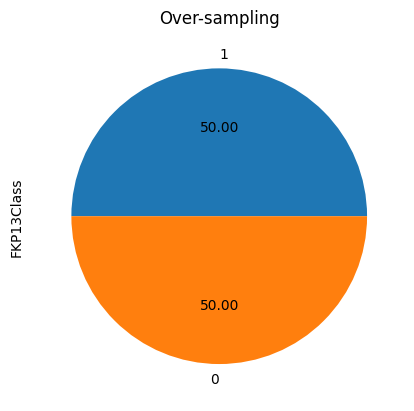

In [368]:
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(sampling_strategy = 'not majority')
X_resOv, y_resOV = rus.fit_resample(X,y)

ax = y_resOV.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title('Over-sampling')


In [369]:
X_resOv.isna().sum()

PSTV01             0
PSTV02             0
PSTV15             0
FKP02              0
FKP03              0
FKP04              0
FKP05              0
FKP06              0
FKP07              0
FKP08              0
FKP09              0
FKP10              0
FKP11              2
FKP12              0
FKP14        2556189
FKP15        2556189
FKP16              0
FKP17              0
FKP20              0
FKP21         379370
FKP22              0
diff_days          0
dtype: int64

# XGBoost

In [370]:
X = X_resOv.drop(['FKP02'], axis = 1)

y = y_resOV

In [371]:
X.keys()

Index(['PSTV01', 'PSTV02', 'PSTV15', 'FKP03', 'FKP04', 'FKP05', 'FKP06',
       'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP15',
       'FKP16', 'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days'],
      dtype='object')

In [372]:
#Split data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((4215217, 21), (1053805, 21), (4215217,), (1053805,))

In [373]:
X_train.isna().sum()

PSTV01             0
PSTV02             0
PSTV15             0
FKP03              0
FKP04              0
FKP05              0
FKP06              0
FKP07              0
FKP08              0
FKP09              0
FKP10              0
FKP11              2
FKP12              0
FKP14        2045088
FKP15        2045088
FKP16              0
FKP17              0
FKP20              0
FKP21         303483
FKP22              0
diff_days          0
dtype: int64

In [374]:
import warnings
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll import scope
from sklearn.metrics import f1_score

def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    clf = xgb.XGBClassifier(n_estimators = 2000, #n_estimators =int(space['n_estimators'])n_estimators = space['n_estimators']
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree'],
                            reg_alpha = int(space['reg_alpha'])
                            )
    
    
    
    # classifier.fit(X_train, y_train)

    # # Applying k-Fold Cross Validation
    # from sklearn.model_selection import cross_val_score
    # accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    # CrossValMean = accuracies.mean()

    # print("CrossValMean:", CrossValMean)

    # return{'loss':1-CrossValMean, 'status': STATUS_OK }

    evaluation = [( X_train, y_train), ( X_valid, y_valid)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_valid)
    f1 = f1_score(y_valid, pred>0.5)
    print ("SCORE:", f1)
    return {'loss': -f1, 'status': STATUS_OK }

In [375]:
space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'reg_alpha': hp.loguniform('alpha', -10, 10)}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best)

In [376]:
print("The best hyperparameters are : ","\n")
print(best)

In [377]:
# #Default model #!1
# model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.1,
#                                           max_depth=5,
#                                           tree_method = 'gpu_hist',
#                                           n_estimators=3000,
#                                           subsample=0.5,
#                                           colsample_bytree=1,
#                                           scale_pos_weight = 1,
#                                           eval_metric='auc',
#                                           verbosity=1,
#                                           use_label_encoder=False,
#                                           objective = 'binary:logistic'
# )

# # Tuned model
# model_xgboost_fin = xgb.XGBClassifier(
# #                                           max_depth=13,
#                                             gpu_id = 1,
#                                           tree_method = 'gpu_hist',
# #                                           gamma = 2.0327870198654407,
# #                                           n_estimators=3000,
# #                                           colsample_bytree= 0.562788079560193,
# #                                           min_child_weight = 4.0,
# #                                           reg_alpha = 41.0,
# #                                           reg_lambda = 0.17268032576514777,
#                                           eval_metric='auc',
#                                           verbosity=1,
#                                           use_label_encoder=False,
#                                           objective = 'binary:logistic',
#                 alpha= 0.0008179090796805187, 
#                 colsample_bytree= 0.68, 
#                 gamma= 0.35000000000000003, 
#                 learning_rate= 0.22, 
#                 max_depth= 24, 
#                 min_child_weight= 5, 
#                 n_estimators= 3000, 
#                 subsample= 0.9400000000000001
# )

#  [[527003    304]
#  [    78 526420]]

model_xgboost_fin = xgb.XGBClassifier(alpha= 0.00029980033966915784,
                                      n_estimators=8000, 
                                      colsample_bytree= 0.59, 
                                      gamma= 0.15, 
                                      learning_rate= 0.32, 
                                      max_depth= 14, 
                                      min_child_weight= 1.0, 
                                      subsample= 0.81,
                                      gpu_id = 1,
                                      eval_metric='auc',
                                      verbosity=1,
                                      objective = 'binary:logistic',
                                      tree_method = 'gpu_hist')

# [[2634244     267]
#  [     52 1422335]]

# model_xgboost_fin = xgb.XGBClassifier(alpha= 0.00033546122062822295, 
#                                       colsample_bytree= 0.78, 
#                                       gamma= 0.1, 
#                                       learning_rate= 0.09, 
#                                       max_depth= 21, 
#                                       min_child_weight= 2.0, 
#                                       subsample= 0.9,
#                                       tree_method = 'gpu_hist')

# [[2633899     612]
#  [     78 1422309]]

eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  eval_set=eval_set,verbose=True)


[19:54:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:256: Only 1 GPUs are visible, setting `gpu_id` to 0
[0]	validation_0-auc:0.99858	validation_1-auc:0.99850
[1]	validation_0-auc:0.99974	validation_1-auc:0.99972
[2]	validation_0-auc:0.99999	validation_1-auc:0.99998
[3]	validation_0-auc:0.99999	validation_1-auc:0.99999
[4]	validation_0-auc:0.99999	validation_1-auc:0.99999
[5]	validation_0-auc:0.99999	validation_1-auc:0.99999
[6]	validation_0-auc:0.99999	validation_1-auc:0.99999
[7]	validation_0-auc:0.99999	validation_1-auc:1.00000
[8]	validation_0-auc:1.00000	validation_1-auc:1.00000
[9]	validation_0-auc:1.00000	validation_1-auc:1.00000
[10]	validation_0-auc:1.00000	validation_1-auc:1.00000
[11]	validation_0-auc:1.00000	validation_1-auc:1.00000
[12]	validation_0-auc:1.00000	validation_1-auc:1.00000
[13]	validation_0-auc:1.00000	validation_1-auc:1.00000
[14]	validation_0-auc:1.00000	validation_1-auc:1.00000
[15]	validation_0-auc:1.00000	validat

XGBClassifier(alpha=0.00029980033966915784, base_score=0.5, booster='gbtree',
              callbacks=None, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.59, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', gamma=0.15, gpu_id=1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.32, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=14, max_leaves=0,
              min_child_weight=1.0, missing=nan, monotone_constraints='()',
              n_estimators=8000, n_jobs=0, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0.000299800333, ...)

In [478]:
# # save the model to disk
# import pickle
# filename = 'finalized_model.pkl'
# pickle.dump(model_xgboost_fin, open(filename, 'wb'))
 

In [428]:
# fit the ensemble on the training dataset
# model_xgboost_fin.fit(X_train, y_train)
# make predictions on test set
ytrain_pred = model_xgboost_fin.predict(X_train)
yhat = model_xgboost_fin.predict(X_valid)


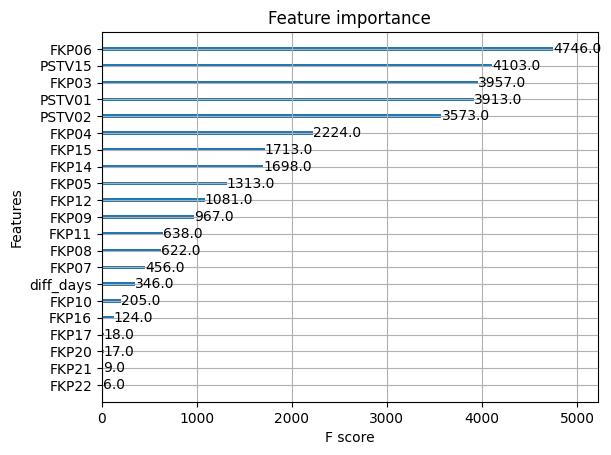

In [429]:
from xgboost import plot_importance
plot_importance(model_xgboost_fin)
plt.show()

In [430]:
from sklearn.metrics import accuracy_score
# evaluate predictions
score = accuracy_score(y_valid, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))

Weighted Avg Accuracy: 99.971


In [431]:
# view test accuracy
accuracy=accuracy_score(yhat,y_valid)
print('Ensemble Model accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, yhat)))

Ensemble Model accuracy score: 0.9997


In [432]:
# view train accuracy
accuracy=accuracy_score(ytrain_pred,y_train)
print('Ensemble Model accuracy score: {0:0.4f}'.format(accuracy_score(y_valid, yhat)))

Ensemble Model accuracy score: 0.9997


In [433]:
# Classification report
print(classification_report(y_valid, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    526886
           1       1.00      1.00      1.00    526919

    accuracy                           1.00   1053805
   macro avg       1.00      1.00      1.00   1053805
weighted avg       1.00      1.00      1.00   1053805



In [434]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, yhat)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[526640    246]
 [    59 526860]]

True Positives(TP) =  526640

True Negatives(TN) =  526860

False Positives(FP) =  246

False Negatives(FN) =  59


In [435]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [436]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)

### Summary

In [437]:
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Specificity : {0:0.4f}'.format(specificity))

Recall or Sensitivity : 0.9999
Classification accuracy : 0.9997
Precision : 0.9995
Specificity : 0.9995


# Predict all data

In [438]:
df_final = train
df_final

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP20,FKP21,FKP22,FKP13Class,diff_days
0,157978748.0,50765420,20.064983,958073632,212,212,61,6108,3,1,4,1,12.0,2,NaN,NaN,98,9998,98,98.0,2,1,0.0
1,95085112.0,26931775,2.626307,449590620P000054,533,533,51,5171,9,3,2,1,1.0,4,773.0,3609.0,98,9998,98,98.0,1,0,0.0
2,224470578.0,227368233,1.051830,467490619P000001,151,151,35,3516,9,2,1,1,3.0,4,1757.0,9301.0,98,9998,98,98.0,1,0,0.0
3,63871289.0,62313678,364.741455,254321219Y002368,354,354,34,3402,3,1,4,1,1.0,5,621.0,2852.0,98,9998,98,98.0,1,0,0.0
4,29915626.0,113446188,1.050523,88681119P000020,307,307,35,3509,3,1,4,1,1.0,1,622.0,2854.0,98,9998,98,98.0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,1285820875,575,575,35,3505,9,3,2,1,12.0,4,NaN,NaN,98,9998,98,98.0,2,1,0.0
4056894,30859241.0,30859241,3.886934,315641120P000514,683,683,35,3514,9,2,1,1,1.0,5,561.0,2528.0,35,3514,14,NaN,1,0,0.0
4056895,8859416.0,8859416,6.146070,962412926,227,227,11,1171,4,2,1,1,13.0,5,NaN,NaN,98,9998,98,98.0,2,1,0.0
4056896,399491834.0,399491834,26.548826,273170420P000003,456,456,74,7402,3,1,3,1,1.0,2,774.0,3612.0,98,9998,98,98.0,1,0,0.0


In [439]:
df_final.keys()

Index(['PSTV01', 'PSTV02', 'PSTV15', 'FKP02', 'FKP03', 'FKP04', 'FKP05',
       'FKP06', 'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14',
       'FKP15', 'FKP16', 'FKP17', 'FKP20', 'FKP21', 'FKP22', 'FKP13Class',
       'diff_days'],
      dtype='object')

In [440]:
X_train.keys()

Index(['PSTV01', 'PSTV02', 'PSTV15', 'FKP03', 'FKP04', 'FKP05', 'FKP06',
       'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP15',
       'FKP16', 'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days'],
      dtype='object')

In [441]:
X_final_test = df_final[['PSTV01','PSTV02', 'PSTV15', 'FKP03', 'FKP04', 'FKP05', 'FKP06', 'FKP07',
       'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP15', 'FKP16',
       'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days']]
y_final_test = df_final[['FKP13Class']]
X_final_test.shape, y_final_test.shape

((4056898, 21), (4056898, 1))

In [442]:
X_final_test

,PSTV01,PSTV02,PSTV15,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP20,FKP21,FKP22,diff_days
0,157978748.0,50765420,20.064983,212,212,61,6108,3,1,4,1,12.0,2,NaN,NaN,98,9998,98,98.0,2,0.0
1,95085112.0,26931775,2.626307,533,533,51,5171,9,3,2,1,1.0,4,773.0,3609.0,98,9998,98,98.0,1,0.0
2,224470578.0,227368233,1.051830,151,151,35,3516,9,2,1,1,3.0,4,1757.0,9301.0,98,9998,98,98.0,1,0.0
3,63871289.0,62313678,364.741455,354,354,34,3402,3,1,4,1,1.0,5,621.0,2852.0,98,9998,98,98.0,1,0.0
4,29915626.0,113446188,1.050523,307,307,35,3509,3,1,4,1,1.0,1,622.0,2854.0,98,9998,98,98.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,575,575,35,3505,9,3,2,1,12.0,4,NaN,NaN,98,9998,98,98.0,2,0.0
4056894,30859241.0,30859241,3.886934,683,683,35,3514,9,2,1,1,1.0,5,561.0,2528.0,35,3514,14,NaN,1,0.0
4056895,8859416.0,8859416,6.146070,227,227,11,1171,4,2,1,1,13.0,5,NaN,NaN,98,9998,98,98.0,2,0.0
4056896,399491834.0,399491834,26.548826,456,456,74,7402,3,1,3,1,1.0,2,774.0,3612.0,98,9998,98,98.0,1,0.0


In [443]:
#XGBoost Model
y_final_test_predict = model_xgboost_fin.predict(X_final_test)

#LightGBM Model
# y_final_test_predict = GBMclf.predict(X_final_test)

#Ensemble Model
# y_final_test_predict = ensemble.predict(X_final_test)

#Logistic Regression
# y_final_test_predict = logreg.predict(X_final_test)
y_final_test_predict

array([1, 0, 0, ..., 1, 0, 1])

In [444]:
y_final_test = y_final_test.to_numpy()

In [445]:
y_final_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [446]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_final_test, y_final_test_predict)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2634264     247]
 [     52 1422335]]

True Positives(TP) =  2634264

True Negatives(TN) =  1422335

False Positives(FP) =  247

False Negatives(FN) =  52


<AxesSubplot: >

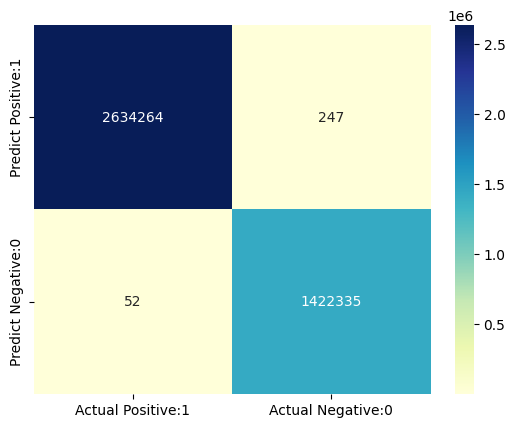

In [447]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [448]:
# np.unique()

np.unique(y_final_test, return_counts=True)

(array([0, 1], dtype=int64), array([2634511, 1422387], dtype=int64))

In [449]:
np.unique(y_final_test_predict, return_counts=True)

(array([0, 1]), array([2634316, 1422582], dtype=int64))

In [450]:
print(classification_report(y_final_test, y_final_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2634511
           1       1.00      1.00      1.00   1422387

    accuracy                           1.00   4056898
   macro avg       1.00      1.00      1.00   4056898
weighted avg       1.00      1.00      1.00   4056898



In [451]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [452]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)

#### Cross validation

In [453]:
# # Applying 10-Fold Cross Validation

# from sklearn.model_selection import cross_val_score

# scoresV = cross_val_score(ensemble, X_train, y_train, cv = 5, scoring='accuracy')

# print('Cross-validation scores:{}'.format(scores))

In [454]:
# # compute Average cross-validation score

# print('Average cross-validation score: {:.4f}'.format(scoresV.mean()))

### Summary

In [455]:
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Precision : {0:0.4f}'.format(precision))
print('Specificity : {0:0.4f}'.format(specificity))
# print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Recall or Sensitivity : 1.0000
Classification accuracy : 0.9999
Precision : 0.9999
Specificity : 0.9998


Average cross-validation score: 0.9972

# Submission

In [456]:
sub =  pd.read_csv('submission_real.csv')

C:\Users\Aldo\AppData\Local\Temp\ipykernel_3032\1210258981.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sub =  pd.read_csv('submission_real.csv')


In [457]:
sub

,Unnamed: 0,FKP02,Status
0,1,954386050,NaN
1,2,774246805,NaN
2,3,1202010273,NaN
3,4,1286640248,NaN
4,5,1285179242,NaN
...,...,...,...
1014220,1014221,248870919P000406,NaN
1014221,1014222,116000620P000034,NaN
1014222,1014223,160421019P000631,NaN
1014223,1014224,332670919P000083,NaN


In [458]:
sub_test = test

In [459]:
sub_test

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP20,FKP21,FKP22,diff_days,Status
0,187883292.0,98048784,240.884842,954386050,232,232,31,3172,9,2,1,1,13,5,NaN,NaN,98,9998,98,98.0,2,0.0,1
1,123307139.0,20969999,47.378571,774246805,42,42,17,1705,3,1,3,1,12,2,NaN,NaN,98,9998,98,98.0,2,0.0,1
2,21416273.0,21416273,5.882927,1202010273,451,451,64,6402,3,1,4,1,13,2,NaN,NaN,98,9998,98,98.0,2,0.0,1
3,97630052.0,97630052,172.916031,1286640248,576,576,18,1872,9,2,5,1,13,5,NaN,NaN,98,9998,98,98.0,2,0.0,1
4,124531163.0,124531163,187.203140,1285179242,574,574,18,1809,9,2,5,1,13,2,NaN,NaN,98,9998,98,98.0,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014220,51801010.0,51801010,7.563763,248870919P000406,250,250,36,3601,9,2,1,1,1,4,1818.0,6834.0,36,3602,27,NaN,1,0.0,0
1014221,339397889.0,339397889,11.063568,116000620P000034,518,518,33,3373,9,2,1,1,1,4,1818.0,6835.0,98,9998,98,98.0,1,0.0,0
1014222,76213152.0,76213152,286.792694,160421019P000631,287,287,32,3276,3,1,3,1,1,5,1818.0,6834.0,32,3276,33,NaN,1,0.0,0
1014223,101797983.0,101797983,30.222155,332670919P000083,248,248,16,1606,3,1,3,1,1,4,1818.0,6834.0,16,1606,27,NaN,1,0.0,0


In [460]:
print('submission',len(sub))
print('test',len(sub_test))

submission 1014225
test 1014225


# Feature Selection

In [485]:
X_sub_test = sub_test[['PSTV01','PSTV02', 'PSTV15', 'FKP03', 'FKP04', 'FKP05', 'FKP06', 'FKP07',
       'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP15', 'FKP16',
       'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days']]

In [486]:
X_final_test.keys()

Index(['PSTV01', 'PSTV02', 'PSTV15', 'FKP03', 'FKP04', 'FKP05', 'FKP06',
       'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP15',
       'FKP16', 'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days'],
      dtype='object')

In [487]:
X_sub_test.keys()

Index(['PSTV01', 'PSTV02', 'PSTV15', 'FKP03', 'FKP04', 'FKP05', 'FKP06',
       'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP15',
       'FKP16', 'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days'],
      dtype='object')

In [488]:
X_train.keys()

Index(['PSTV01', 'PSTV02', 'PSTV15', 'FKP03', 'FKP04', 'FKP05', 'FKP06',
       'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP15',
       'FKP16', 'FKP17', 'FKP20', 'FKP21', 'FKP22', 'diff_days'],
      dtype='object')

In [489]:
X_sub_test.isna().sum()

PSTV01            0
PSTV02            0
PSTV15            0
FKP03             0
FKP04             0
FKP05             0
FKP06             0
FKP07             0
FKP08             0
FKP09             0
FKP10             0
FKP11             0
FKP12             0
FKP14        345912
FKP15        345912
FKP16             0
FKP17             0
FKP20             0
FKP21         94608
FKP22             0
diff_days         0
dtype: int64

In [490]:
# Unique values
for i in X_sub_test.keys():
    print(f"Unique values in variabel {i} is ", X_sub_test[i].unique())

Unique values in variabel PSTV01 is  [1.87883292e+08 1.23307139e+08 2.14162730e+07 ... 4.50278780e+07
 5.18010100e+07 3.39397889e+08]
Unique values in variabel PSTV02 is  [ 98048784  20969999  21416273 ... 439039615  45027878 339397889]
Unique values in variabel PSTV15 is  [240.88484192  47.37857056   5.88292694 ... 175.89840698 215.11930847
 111.9799118 ]
Unique values in variabel FKP03 is  [232  42 451 576 574 322 469 435 400 191 603  41 260 333 570 678 254 104
 643 253 594 727 631 720  59 689 361 630 434 150 406 317 257 321 688 182
 586 363 714  90 682 440 278  86 522 176  38 540 161 670 221 701 582 493
 690 336 595  72 673  98 610  95 683 295 411 549 245 185  60 409 350 604
  69 198 140 130 552   4  25 297 368 291 436 228   3 664 611 146 410 665
 620 687 659 458 247 637 332 547 387 113 313 475 489 162 626 119 722 301
 151 456 704 338 634 619 466  45 581 330 524 252 567  88 424  13 641  50
 296 657 486 514 629 470 692 315 305 531 496  73 615 349 490 419 224  37
 318 596 648 231 268 

In [491]:
y_pred_sub = model_xgboost_fin.predict(X_sub_test)

y_pred_sub

array([1, 1, 1, ..., 0, 0, 0])

In [492]:
y_pred_sub

array([1, 1, 1, ..., 0, 0, 0])

In [493]:
sub_test

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP15,FKP16,FKP17,FKP20,FKP21,FKP22,diff_days,Status
0,187883292.0,98048784,240.884842,954386050,232,232,31,3172,9,2,1,1,13,5,NaN,NaN,98,9998,98,98.0,2,0.0,1
1,123307139.0,20969999,47.378571,774246805,42,42,17,1705,3,1,3,1,12,2,NaN,NaN,98,9998,98,98.0,2,0.0,1
2,21416273.0,21416273,5.882927,1202010273,451,451,64,6402,3,1,4,1,13,2,NaN,NaN,98,9998,98,98.0,2,0.0,1
3,97630052.0,97630052,172.916031,1286640248,576,576,18,1872,9,2,5,1,13,5,NaN,NaN,98,9998,98,98.0,2,0.0,1
4,124531163.0,124531163,187.203140,1285179242,574,574,18,1809,9,2,5,1,13,2,NaN,NaN,98,9998,98,98.0,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014220,51801010.0,51801010,7.563763,248870919P000406,250,250,36,3601,9,2,1,1,1,4,1818.0,6834.0,36,3602,27,NaN,1,0.0,0
1014221,339397889.0,339397889,11.063568,116000620P000034,518,518,33,3373,9,2,1,1,1,4,1818.0,6835.0,98,9998,98,98.0,1,0.0,0
1014222,76213152.0,76213152,286.792694,160421019P000631,287,287,32,3276,3,1,3,1,1,5,1818.0,6834.0,32,3276,33,NaN,1,0.0,0
1014223,101797983.0,101797983,30.222155,332670919P000083,248,248,16,1606,3,1,3,1,1,4,1818.0,6834.0,16,1606,27,NaN,1,0.0,0


In [494]:
sub_test['Status'] = y_pred_sub

In [495]:
fin = sub_test[['FKP02', 'Status']]

In [496]:
fin

,FKP02,Status
0,954386050,1
1,774246805,1
2,1202010273,1
3,1286640248,1
4,1285179242,1
...,...,...
1014220,248870919P000406,0
1014221,116000620P000034,0
1014222,160421019P000631,0
1014223,332670919P000083,0


In [497]:
fin.index += 1 
fin.index

RangeIndex(start=1, stop=1014226, step=1)

In [501]:
fin.to_csv('submission_70.csv')

In [502]:
t2 = pd.read_csv('submission_70.csv')
t2

C:\Users\Aldo\AppData\Local\Temp\ipykernel_3032\3362633036.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  t2 = pd.read_csv('submission_70.csv')


,Unnamed: 0,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [503]:
t2["FKP02"] = t2["FKP02"].astype(str)
t2['FKP02'] = t2['FKP02'].apply(lambda x: f'"{x}"')

t2["Unnamed: 0"] = t2["Unnamed: 0"].astype(str)
t2['Unnamed: 0'] = t2['Unnamed: 0'].apply(lambda x: f'"{x}"')

t2.head()

,Unnamed: 0,FKP02,Status
0,"""1""","""954386050""",1
1,"""2""","""774246805""",1
2,"""3""","""1202010273""",1
3,"""4""","""1286640248""",1
4,"""5""","""1285179242""",1


In [504]:
len(t2)

1014225

In [505]:
import csv

t2.to_csv('finalfinal_sub.csv', quoting=csv.QUOTE_NONE, index=False)

In [506]:
import xgboost

In [507]:
print(xgboost.__version__)

1.6.2
